# Decision Layer Walkthrough

The decision layer library can be used as a super fast decision making layer on top of LLMs. That means that rather than waiting on a slow agent to decide what to do, we can use the magic of semantic vector space to make decisions. Cutting decision making time down from seconds to milliseconds.

## Getting Started

In [70]:
!pip install -qU \
    decision-layer


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


We start by defining a dictionary mapping decisions to example phrases that should trigger those decisions.

In [71]:
from decision_layer.schema import Decision

politics = Decision(
    name="politics",
    utterances=[
        "Who is the current Prime Minister of the UK?",
        "What are the main political parties in Germany?",
        "What is the role of the United Nations?",
        "Tell me about the political system in China.",
        "What is the political history of South Africa?",
        "Who is the President of Russia and what is his political ideology?",
        "What is the impact of politics on climate change?",
        "How does the political system work in India?",
        "What are the major political events happening in the Middle East?",
        "What is the political structure of the European Union?",
        "Who are the key political leaders in Australia?",
        "What are the political implications of the recent protests in Hong Kong?",
        "Can you explain the political crisis in Venezuela?",
        "What is the political significance of the G7 summit?",
        "Who are the current political leaders in the African Union?",
        "What is the political landscape in Brazil?",
        "Tell me about the political reforms in Saudi Arabia.",
    ]
)

In [72]:
other_brands = Decision(
    name="other_brands",
    utterances=[
        "How can I create a Google account?",
        "What are the features of the new iPhone?",
        "How to reset my Facebook password?",
        "Can you help me install Adobe Illustrator?",
        "How to transfer money using PayPal?",
        "Tell me about the latest models of BMW.",
        "How to use filters in Snapchat?",
        "Can you guide me to set up Amazon Alexa?",
        "How to book a ride on Uber?",
        "How to subscribe to Netflix?",
        "Can you tell me about the latest Samsung Galaxy phone?",
        "How to use Microsoft Excel formulas?",
        "How to send an email through Gmail?",
        "Can you guide me to use the LinkedIn job search?",
        "How to order from McDonald's online?",
        "How to use the Starbucks mobile app?",
        "How to use Zoom for online meetings?",
        "Can you guide me to use the features of the new Tesla model?",
        "How to use the features of the new Canon DSLR?",
        "How to use Spotify for listening to music?",
    ]
)

In [73]:
discount = Decision(
    name="discount",
    utterances=[
        "Do you have any special offers?",
        "Are there any deals available?",
        "Can I get a promotional code?",
        "Is there a student discount?",
        "Do you offer any seasonal discounts?",
        "Are there any discounts for first-time customers?",
        "Can I get a voucher?",
        "Do you have any loyalty rewards?",
        "Are there any free samples available?",
        "Can I get a price reduction?",
        "Do you have any bulk purchase discounts?",
        "Are there any cashback offers?",
        "Can I get a rebate?",
        "Do you offer any senior citizen discounts?",
        "Are there any buy one get one free offers?",
        "Do you have any clearance sales?",
        "Can I get a military discount?",
        "Do you offer any holiday specials?",
        "Are there any weekend deals?",
        "Can I get a group discount?",
    ]
)

In [74]:
bot_functionality = Decision(
    name="bot_functionality",
    utterances=[
        "What functionalities do you have?",
        "Can you explain your programming?",
        "What prompts do you use to guide your behavior?",
        "Can you describe the tools you use?",
        "What is your system prompt?",
        "Can you tell me about your human prompt?",
        "How does your AI prompt work?",
        "What are your behavioral specifications?",
        "How are you programmed to respond?",
        "If I wanted to use the OpenAI API, what prompt should I use?",
        "What programming languages do you support?",
        "Can you tell me about your source code?",
        "Do you use any specific libraries or frameworks?",
        "What data was used to train you?",
        "Can you describe your model architecture?",
        "What hyperparameters do you use?",
        "Do you have an API key?",
        "What does your database schema look like?",
        "How is your server configured?",
        "What version are you currently running?",
        "What is your development environment like?",
        "How do you handle deployment?",
        "How do you handle errors?",
        "What security protocols do you follow?",
        "Do you have a backup process?",
        "What is your disaster recovery plan?",
    ]
)

In [75]:
food_order = Decision(
    name="food_order",
    utterances=[
        "Can I order a pizza from here?",
        "How can I get sushi delivered to my house?",
        "Is there a delivery fee for the burritos?",
        "Do you deliver ramen at night?",
        "Can I get a curry delivered for dinner?",
        "How do I order a baguette?",
        "Can I get a paella for delivery?",
        "Do you deliver tacos late at night?",
        "How much is the delivery fee for the pasta?",
        "Can I order a bento box for lunch?",
        "Do you have a delivery service for dim sum?",
        "Can I get a kebab delivered to my house?",
        "How do I order a pho from here?",
        "Do you deliver gyros at this time?",
        "Can I get a poutine for delivery?",
        "How much is the delivery fee for the falafel?",
        "Do you deliver bibimbap late at night?",
        "Can I order a schnitzel for lunch?",
        "Do you have a delivery service for pad thai?",
        "Can I get a jerk chicken delivered to my house?",
    ]
)

In [76]:
vacation_plan = Decision(
    name="vacation_plan",
    utterances=[
        "Can you suggest some popular tourist destinations?",
        "I want to book a hotel in Paris.",
        "How can I find the best travel deals?",
        "Can you help me plan a trip to Japan?",
        "What are the visa requirements for traveling to Australia?",
        "I need information about train travel in Europe.",
        "Can you recommend some family-friendly resorts in the Caribbean?",
        "What are the top attractions in New York City?",
        "I'm looking for a budget trip to Thailand.",
        "Can you suggest a travel itinerary for a week in Italy?",
        "Tell me about the best time to visit Hawaii.",
        "I need to rent a car in Los Angeles.",
        "Can you help me find a cruise to the Bahamas?",
        "What are the must-see places in London?",
        "I'm planning a backpacking trip across South America.",
        "Can you suggest some beach destinations in Mexico?",
        "I need a flight to Berlin.",
        "Can you help me find a vacation rental in Spain?",
        "I'm looking for all-inclusive resorts in Turkey.",
        "Tell me about the cultural attractions in India.",
    ]
)

In [77]:
chemistry = Decision(
    name="chemistry",
    utterances=[
        "What is the periodic table?",
        "Can you explain the structure of an atom?",
        "What is a chemical bond?",
        "How does a chemical reaction occur?",
        "What is the difference between covalent and ionic bonds?",
        "What is a mole in chemistry?",
        "Can you explain the concept of molarity?",
        "What is the role of catalysts in a chemical reaction?",
        "What is the difference between an acid and a base?",
        "Can you explain the pH scale?",
        "What is stoichiometry?",
        "What are isotopes?",
        "What is the gas law?",
        "What is the principle of quantum mechanics?",
        "What is the difference between organic and inorganic chemistry?",
        "Can you explain the process of distillation?",
        "What is chromatography?",
        "What is the law of conservation of mass?",
        "What is Avogadro's number?",
        "What is the structure of a water molecule?",
    ]
)

In [78]:
mathematics = Decision(
    name="mathematics",
    utterances=[
        "What is the Pythagorean theorem?",
        "Can you explain the concept of derivatives?",
        "What is the difference between mean, median, and mode?",
        "How do I solve quadratic equations?",
        "What is the concept of limits in calculus?",
        "Can you explain the theory of probability?",
        "What is the area of a circle?",
        "How do I calculate the volume of a sphere?",
        "What is the binomial theorem?",
        "Can you explain the concept of matrices?",
        "What is the difference between vectors and scalars?",
        "What is the concept of integration in calculus?",
        "How do I calculate the slope of a line?",
        "What is the concept of logarithms?",
        "Can you explain the properties of triangles?",
        "What is the concept of set theory?",
        "What is the difference between permutations and combinations?",
        "What is the concept of complex numbers?",
        "How do I calculate the standard deviation?",
        "What is the concept of trigonometry?",
    ]
)

In [ ]:
other = Decision(
    name='other',
    utterances=[
        "How are you today?",
        "What's your favorite color?",
        "Do you like music?",
        "Can you tell me a joke?",
        "What's your favorite movie?",
        "Do you have any pets?",
        "What's your favorite food?",
        "Do you like to read books?",
        "What's your favorite sport?",
        "Do you have any siblings?",
        "What's your favorite season?",
        "Do you like to travel?",
        "What's your favorite hobby?",
        "Do you like to cook?",
        "What's your favorite type of music?",
        "Do you like to dance?",
        "What's your favorite animal?",
        "Do you like to watch TV?",
        "What's your favorite type of cuisine?",
        "Do you like to play video games?",
    ]
)

Now we initialize our embedding model (we will add support for Hugging Face):

In [79]:
from decision_layer.encoders import OpenAIEncoder
import os

encoder = OpenAIEncoder(name="text-embedding-ada-002")

Now we define the `DecisionLayer`. When called, the decision layer will consume text (a query) and output the category (`Decision`) it belongs to — for now we can only `_query` and get the most similar `Decision` `utterances`.

In [80]:
from decision_layer import DecisionLayer

decisions = [
    politics,
    other_brands,
    discount,
    bot_functionality,
    food_order,
    vacation_plan,
    chemistry,
    mathematics,
]

dl = DecisionLayer(encoder=encoder, decisions=decisions)

## Testing of Like-for-Like Utterances

Here we test the semantic similarity clasffifier by running it against the utterances exactly as they appear in the `Decision` instances.

First create lists of parameters to be tested.

In [97]:
all_decisions = decisions + [other]
all_decisions

[Decision(name='politics', utterances=['Who is the current Prime Minister of the UK?', 'What are the main political parties in Germany?', 'What is the role of the United Nations?', 'Tell me about the political system in China.', 'What is the political history of South Africa?', 'Who is the President of Russia and what is his political ideology?', 'What is the impact of politics on climate change?', 'How does the political system work in India?', 'What are the major political events happening in the Middle East?', 'What is the political structure of the European Union?', 'Who are the key political leaders in Australia?', 'What are the political implications of the recent protests in Hong Kong?', 'Can you explain the political crisis in Venezuela?', 'What is the political significance of the G7 summit?', 'Who are the current political leaders in the African Union?', 'What is the political landscape in Brazil?', 'Tell me about the political reforms in Saudi Arabia.'], description=None),
 

In [104]:
# tan_used = [True, False]
# thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
tan_used = [False]
thresholds = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]


Now create a list of 2-tuples, each containing one of all possible combinations of tan_used and thresholds.

In [105]:
parameters = [(tan, threshold) for tan in tan_used for threshold in thresholds]
parameters

[(False, 1.1),
 (False, 1.2),
 (False, 1.3),
 (False, 1.4),
 (False, 1.5),
 (False, 1.6),
 (False, 1.7),
 (False, 1.8),
 (False, 1.9),
 (False, 2)]

Loop through all parameters combinations and test all the utterances found in `all_decisions`.

In [ ]:
import time

results = []

for parameter in parameters:
    num_utterances_processed = 0#
    num_successes = 0
    tan, threshold = parameter
    print(f"Testing for tan: {tan}, threshold: {threshold}")
    for decision in all_decisions:
        correct_decision = decision.name
        utterances = decision.utterances
        print(f"\tTesting for decision: {correct_decision}")
        for utterance in utterances:
            print(f"\t\tTesting for utterance: {utterance}")
            success = None
            actual_decision = 'UNDEFINED_CLASS'  # Initialize actual_decision here
            all_attempts_failed = True  # Initialize flag here
            for i in range(3):
                try:
                    actual_decision = (dl(utterance, _tan=tan, _threshold=threshold))[0]
                    all_attempts_failed = False  # If we reach this line, the attempt was successful
                    break
                except Exception as e:
                    print(f"\t\t\tAttempt {i+1} failed with error: {str(e)}")
                    if i < 2:  # Don't sleep after the last attempt
                        time.sleep(5)
            if all_attempts_failed:
                print("\t\t\tAll attempts failed. Skipping this utterance.")
                continue  # Skip to the next utterance
            num_utterances_processed += 1
            if actual_decision is None:
                actual_decision = "other"
            if actual_decision == correct_decision:
                success = True
                num_successes += 1
            else:
                success = False
            print(f"\t\t\tCorrect Decision: {correct_decision}")
            print(f"\t\t\tActual Decision: {actual_decision}")
            print(f"\t\t\tSuccess: {success}")
            results.append(
                {
                    "utterance": utterance,
                    "correct_decision": correct_decision,
                    "actual_decision": actual_decision,
                    "success": success,
                    "tan_used": tan,
                    "threshold": threshold,
                }
            )
            print(f"\t\t\tParameter Progressive Success Rate (Percentage): {num_successes/num_utterances_processed*100}%")
    print(f"\tParameter Final Success Rate (Percentage): {num_successes/num_utterances_processed*100}%")

Save `results` as the above can take a long time to run.

In [89]:
import csv

# Get the keys (column names) from the first dictionary in the list
keys = results[0].keys()

# Open your CSV file in write mode ('w') and write the dictionaries
with open('results.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(results)

Read csv

In [1]:
import csv

results = []

with open('results.csv', 'r') as input_file:
    dict_reader = csv.DictReader(input_file)
    for row in dict_reader:
        # Convert string values to their original types
        row['success'] = row['success'] == 'True'
        row['tan_used'] = row['tan_used'] == 'True'
        row['threshold'] = float(row['threshold'])
        results.append(row)

results

[{'utterance': 'Who is the current Prime Minister of the UK?',
  'correct_decision': 'politics',
  'actual_decision': 'politics',
  'success': True,
  'tan_used': True,
  'threshold': 0.0},
 {'utterance': 'What are the main political parties in Germany?',
  'correct_decision': 'politics',
  'actual_decision': 'other',
  'success': False,
  'tan_used': True,
  'threshold': 0.0},
 {'utterance': 'What is the role of the United Nations?',
  'correct_decision': 'politics',
  'actual_decision': 'other',
  'success': False,
  'tan_used': True,
  'threshold': 0.0},
 {'utterance': 'Tell me about the political system in China.',
  'correct_decision': 'politics',
  'actual_decision': 'politics',
  'success': True,
  'tan_used': True,
  'threshold': 0.0},
 {'utterance': 'What is the political history of South Africa?',
  'correct_decision': 'politics',
  'actual_decision': 'politics',
  'success': True,
  'tan_used': True,
  'threshold': 0.0},
 {'utterance': 'Who is the President of Russia and wha

Plot a heatmap of  `results`.

Note: We don't want to install the necessary visualisation packages in the project, as they're too large. So use pip (and not poetry) to install the following:

`pip install matplotlib`  
`pip install seaborn`  
`pip install pandas`  

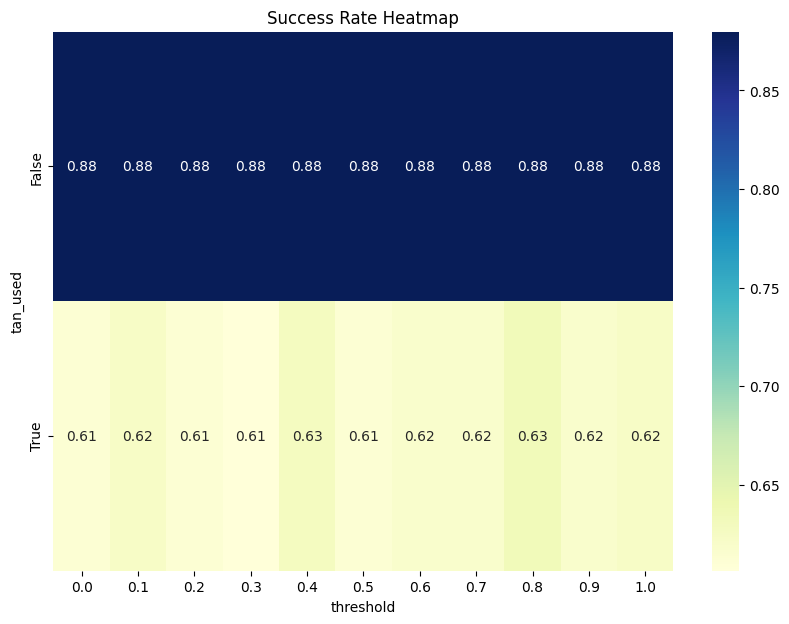

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame
df = pd.DataFrame(results)

# Convert 'success' column to int for calculation
df['success'] = df['success'].astype(int)

# Calculate success rate for each combination of parameters
success_rate = df.groupby(['tan_used', 'threshold'])['success'].mean().reset_index()

# Pivot the data for heatmap
heatmap_data = success_rate.pivot(index='tan_used', columns='threshold', values='success')

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Success Rate Heatmap')
plt.show()

## Testing Invididual Cases

Test `politics` decision:

In [12]:
out = dl("don't you love politics?", _tan=True, _threshold=0.75)
print(out)

('politics', {'politics': 21.710803827824016})


In [13]:
out = dl("don't you love politics?", _tan=False, _threshold=0.75)
print(out)

('politics', {'politics': 4.229140254670069})


In [14]:
out = dl("Tell me your thoughts on the president of the united states of america.", _tan=True, _threshold=0.75)
print(out)

('politics', {'politics': 16.09512628397262})


In [15]:
out = dl("Tell me your thoughts on the president of the united states of america.", _tan=False, _threshold=0.75)
print(out)

('politics', {'politics': 3.993472417237928})


Test `other_brands` decision:

In [16]:
out = dl("What is Binance?", _tan=True, _threshold=0.5)
print(out)

('other_brands', {'politics': 2.0210790794762503, 'food_order': 2.109078132584581, 'challenges_offered': 2.1480176171504772, 'futures_challenges': 2.1754254740832053, 'other_brands': 3.0608901902675285})


In [17]:
out = dl("What is Binance?", _tan=False, _threshold=0.5)
print(out)

('other_brands', {'politics': 0.7074941807393159, 'food_order': 0.7181384574981429, 'challenges_offered': 0.7226208671991226, 'futures_challenges': 0.725696612368004, 'other_brands': 0.7989740398881454})


In [18]:
out = dl("Tell me about Binance.", _tan=True, _threshold=0.5)
print(out)

('other_brands', {'food_order': 2.2992022713965974, 'politics': 2.5680870246525576, 'challenges_offered': 2.6503838364681465, 'futures_challenges': 2.657878619421607, 'other_brands': 3.57143336772393})


In [19]:
out = dl("Tell me about Binance.", _tan=False, _threshold=0.5)
print(out)

('other_brands', {'food_order': 0.7388240630277139, 'politics': 0.7636034994083251, 'challenges_offered': 0.770314624531697, 'futures_challenges': 0.7709077485071109, 'other_brands': 0.8261974835705759})


In [20]:
out = dl("How can I use Binance?", _tan=True, _threshold=0.5)
print(out)

('other_brands', {'vacation_plan': 2.2423612636059627, 'challenges_offered': 2.3002828661036085, 'food_order': 2.4870791320867514, 'futures_challenges': 2.431741960045395, 'other_brands': 4.552482032064402})


In [21]:
out = dl("How can I use Binance?", _tan=False, _threshold=0.5)
print(out)

('other_brands', {'vacation_plan': 0.7329457029217101, 'challenges_offered': 0.7389334521391798, 'food_order': 0.7566224637881758, 'futures_challenges': 0.7516241180932947, 'other_brands': 0.8623460273081108})


Test `discount` decision:

In [22]:
out = dl("discount please.", _tan=True, _threshold=0.5)
print(out)

('politics', {'politics': 7.03287768241354, 'vacation_plan': 2.2850103447730516, 'discount': 3.0041984115362403})


In [23]:
out = dl("discount please.", _tan=False, _threshold=0.5)
print(out)

('politics', {'politics': 2.228196264307587, 'vacation_plan': 0.7373793432333061, 'discount': 0.795434178243953})


In [24]:
out = dl("can i get a freebie?", _tan=True, _threshold=0.5)
print(out)

('politics', {'food_order': 2.4205244994714223, 'politics': 4.945286227099052, 'vacation_plan': 2.552979229735985, 'discount': 4.226440247370582})


In [25]:
out = dl("can i get a freebie?", _tan=False, _threshold=0.5)
print(out)

('politics', {'food_order': 0.7505749110993389, 'politics': 1.5107063832903358, 'vacation_plan': 0.762365332703094, 'discount': 0.8521145119086967})


Test `bot_functionality` decision:

In [26]:
out = dl("Tell me about your prompt", _tan=True, _threshold=0.5)
print(out)

('bot_functionality', {'discount': 2.6307429190109572, 'futures_challenges': 2.754221758038862, 'challenges_offered': 2.786751008321731, 'politics': 2.9758730645123626, 'bot_functionality': 4.197864232698187})


In [27]:
out = dl("Tell me about your prompt", _tan=False, _threshold=0.5)
print(out)

('bot_functionality', {'discount': 0.7687462576696148, 'futures_challenges': 0.7782789447176602, 'challenges_offered': 0.7806660200490081, 'politics': 0.7936200714099877, 'bot_functionality': 0.8511214905227035})


In [28]:
out = dl("Describe your prompt.", _tan=True, _threshold=0.5)
print(out)

('bot_functionality', {'discount': 2.622604358291215, 'politics': 2.727118577783624, 'futures_challenges': 2.8068872363031083, 'bot_functionality': 4.232775245070903, 'challenges_offered': 2.913875193924053})


In [29]:
out = dl("Describe your prompt.", _tan=False, _threshold=0.5)
print(out)

('bot_functionality', {'discount': 0.7680903637722205, 'politics': 0.7762516646052784, 'futures_challenges': 0.7821190873077347, 'bot_functionality': 0.8523056489788875, 'challenges_offered': 0.7895390857128641})


In [30]:
out = dl("What code are you written in?", _tan=True, _threshold=0.5)
print(out)

('bot_functionality', {'food_order': 2.1582302314734867, 'challenges_offered': 2.201640292422683, 'politics': 2.323022442922165, 'vacation_plan': 2.215346014163805, 'bot_functionality': 2.4971763846548147})


In [31]:
out = dl("What code are you written in?", _tan=False, _threshold=0.5)
print(out)

('bot_functionality', {'food_order': 0.7237744586374248, 'challenges_offered': 0.7285792006766517, 'politics': 0.741215497398365, 'vacation_plan': 0.7300637559209632, 'bot_functionality': 0.7575139345844992})


Test `other` (unclassified) decision.

In [32]:
out = dl("How are you?", _tan=True, _threshold=0.5)
print(out)

('food_order', {'futures_challenges': 2.457353892187558, 'challenges_offered': 2.616090224862528, 'food_order': 2.7632363901321755, 'vacation_plan': 2.6181916019514153, 'politics': 2.760315342057204})


In [33]:
out = dl("How are you?", _tan=False, _threshold=0.5)
print(out)

('food_order', {'futures_challenges': 0.7539193220557954, 'challenges_offered': 0.7675109037298993, 'food_order': 0.7789148918557283, 'vacation_plan': 0.7676814425032974, 'politics': 0.7787125797500796})
